# from job_search import data_analytics

## Importing libraries
PIL library used for importing an image to an array and using it as a mask

Wordcloud library used to create the word cloud image

In [1]:
#data ETL
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import json
#used to plot
import seaborn as sns
#used to plot the word cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
#used to plot map
from shapely.geometry import Point
import geopandas as gpd
from scipy import stats
driver = 'mysql+pymysql:'
user = 'root'
password = 'secret'
ip = '127.0.0.1'
database = 'project'
connection_string = f'{driver}//{user}:{password}@{ip}/{database}'
engine = create_engine(connection_string)

In [2]:
#Info extracted 28 of march from https://developer.infojobs.net/test-console/execute.xhtml

In [3]:
frontend_json = json.load(open('front_end_developer.json'))
backend_json = json.load(open('back_end_developer.json'))
wd_json = json.load(open('WD.json'))

In [4]:
def clean_data(json):
    df = pd.DataFrame()
    ids = []
    citys = []
    experience = []
    skills = []
    min_salary = []
    max_salary = []
    salary_period = []
    
    for i in range(len(json['offers'])):
        ids.append(json['offers'][i]['id'])
        citys.append(json['offers'][i]['city'])
        experience.append(json['offers'][i]['experienceMin']['value'])
        skills.append(json['offers'][i]['requirementMin'])
        min_salary.append(json['offers'][i]['salaryMin']['value'])
        max_salary.append(json['offers'][i]['salaryMax']['value'])
        salary_period.append(json['offers'][i]['salaryPeriod']['value'])
        
    df['id'] = ids
    df['city'] = citys
    df['min_experience'] = experience
    df['skills'] = skills
    df['min_salary'] = min_salary
    df['max_salary'] = max_salary
    df['salary_period'] = salary_period
    df.replace("Sant Cugat Del Vall??s","Sant Cugat Del Valles", inplace = True)
    df.min_salary = df.min_salary.apply(lambda x: x.replace('.',''))
    df.min_salary = df.min_salary.apply(lambda x: x.replace(' €',''))
    df.max_salary = df.max_salary.apply(lambda x: x.replace('.',''))
    df.max_salary = df.max_salary.apply(lambda x: x.replace(' €',''))
    df.min_salary = pd.to_numeric(df.min_salary)
    df.max_salary = pd.to_numeric(df.max_salary)
    return df

In [5]:
frontend_2 = clean_data(frontend_json)
backend_2 = clean_data(backend_json)
wd_2 = clean_data(wd_json)

In [6]:
bf_df = pd.concat([frontend_2, backend_2, wd_2])

In [7]:
bf_df.reset_index(drop = True, inplace = True)

# The map plot is only of Iberian Peninsula, so I delete the offers from outside

In [8]:
bf_df[bf_df['city'] == 'Prague']
bf_df.drop(24, axis = 0, inplace = True)

In [9]:
bf_df[bf_df['city'] == 'Melechen']
bf_df.drop(78, axis = 0, inplace = True)

In [10]:
bf_df[bf_df['city'] == 'Santa Cruz De Tenerife']
bf_df.drop(12, axis = 0, inplace = True)

In [11]:
bf_df[bf_df['city'] == 'Santa Cruz De Tenerife']
bf_df.drop(23, axis = 0, inplace = True)

In [12]:
bf_df.reset_index(drop = True, inplace = True)

In [13]:
bf_df.head(100)

,id,city,min_experience,skills,min_salary,max_salary,salary_period
0,bb2eaffc144685a5852bc6efa4511d,Madrid,Más de 5 años,2 years developing w/ReactJS and Redux and Typ...,NaN,NaN,
1,ee0115aa5c460aa94643f673d300f9,Madrid,Al menos 2 años,"Angular (todas las versiones posibles, al meno...",24000.0,33000.0,Bruto/año
2,233218a8984b36b05200d2c77deeba,Alcalá De Henares,Al menos 2 años,Mínimo 2 años de experiencia desarrollo de apl...,NaN,NaN,
3,a33c02b4b74fddac8d5cb5f5e18076,Lleida,No Requerida,Experiencia en puesto similar y conocimientos ...,NaN,NaN,
4,2015a502ba49bfb6041f3eb146356f,Madrid,Al menos 1 año,Qué necesitas saber? Requisitos mínimos - CSS ...,24000.0,30000.0,Bruto/año
5,9b13813ab2439b8e13575ca4f01337,Sant Cugat Del Valles,Al menos 4 años,Experiencia con frameworks MVC (y otros) de Ja...,NaN,NaN,
6,0f42185be3498faf066987e1fb1385,Málaga,No Requerida,,NaN,NaN,
7,38c3f96fc643c48d12d4955a9706e1,Madrid,Al menos 1 año,Experiencia: -Como Programador/a de Front-end....,NaN,NaN,
8,1b4da7ad2c482abe9c32b9d49f72e6,Madrid,Al menos 1 año,Experiencia en desarrollo Angular 2 o 7 a part...,NaN,NaN,
9,4cbb69fcca4f80bc31b2acf70abdf0,Barcelona,Al menos 2 años,Al menos 2 años en Front End aplicaciones .net...,33000.0,36000.0,Bruto/año


In [15]:
gps = pd.read_csv('csvs/ciudades.csv', sep= ";")

In [16]:
bf_df = bf_df.join([gps.Latitude, gps.Longitude])

In [17]:
bf_df.Latitude = bf_df.Latitude.apply(lambda x: x.replace(',','.'))
bf_df.Longitude = bf_df.Longitude.apply(lambda x: x.replace(',','.'))

bf_df.Latitude = pd.to_numeric(bf_df.Latitude)
bf_df.Longitude = pd.to_numeric(bf_df.Longitude)

In [18]:
bf_df[bf_df['city'] == 'Madrid'].groupby(['city', 'min_experience']).count()

id  skills  min_salary  max_salary  salary_period  \
city   min_experience                                                       
Madrid Al menos 1 año   10      10           2           2             10   
       Al menos 2 años   8       8           2           2              8   
       Al menos 3 años   6       6           4           4              6   
       Más de 5 años     4       4           1           1              4   

                        Latitude  Longitude  
city   min_experience                        
Madrid Al menos 1 año         10         10  
       Al menos 2 años         8          8  
       Al menos 3 años         6          6  
       Más de 5 años           4          4

In [19]:
mad_data = bf_df[bf_df['city'] == 'Madrid']
mad_data.head()

,id,city,min_experience,skills,min_salary,max_salary,salary_period,Latitude,Longitude
0,bb2eaffc144685a5852bc6efa4511d,Madrid,Más de 5 años,2 years developing w/ReactJS and Redux and Typ...,NaN,NaN,,40.416677,-3.704021
1,ee0115aa5c460aa94643f673d300f9,Madrid,Al menos 2 años,"Angular (todas las versiones posibles, al meno...",24000.0,33000.0,Bruto/año,40.416677,-3.704021
4,2015a502ba49bfb6041f3eb146356f,Madrid,Al menos 1 año,Qué necesitas saber? Requisitos mínimos - CSS ...,24000.0,30000.0,Bruto/año,40.416677,-3.704021
7,38c3f96fc643c48d12d4955a9706e1,Madrid,Al menos 1 año,Experiencia: -Como Programador/a de Front-end....,NaN,NaN,,40.416677,-3.704021
8,1b4da7ad2c482abe9c32b9d49f72e6,Madrid,Al menos 1 año,Experiencia en desarrollo Angular 2 o 7 a part...,NaN,NaN,,40.416677,-3.704021


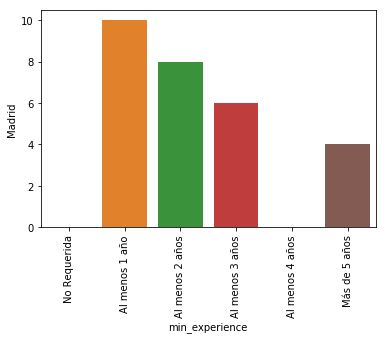

In [20]:
sns.countplot(x = 'min_experience', data = mad_data, order=['No Requerida','Al menos 1 año','Al menos 2 años','Al menos 3 años','Al menos 4 años', 'Más de 5 años'])
plt.xticks(rotation=90)
plt.ylabel('Madrid')
plt.savefig("graficos/madoffers.png")
plt.show()

In [21]:
bf_df[bf_df['city'] == 'Barcelona'].groupby(['city', 'min_experience']).count()

id  skills  min_salary  max_salary  salary_period  \
city      min_experience                                                       
Barcelona Al menos 1 año    6       6           3           3              6   
          Al menos 2 años   4       4           2           2              4   
          Al menos 3 años   2       2           1           1              2   
          Más de 5 años     1       1           1           1              1   
          No Requerida      2       2           2           2              2   

                           Latitude  Longitude  
city      min_experience                        
Barcelona Al menos 1 año          6          6  
          Al menos 2 años         4          4  
          Al menos 3 años         2          2  
          Más de 5 años           1          1  
          No Requerida            2          2

In [22]:
bcn_data = bf_df[bf_df['city'] == 'Barcelona']
bcn_data.head()

,id,city,min_experience,skills,min_salary,max_salary,salary_period,Latitude,Longitude
9,4cbb69fcca4f80bc31b2acf70abdf0,Barcelona,Al menos 2 años,Al menos 2 años en Front End aplicaciones .net...,33000.0,36000.0,Bruto/año,41.38694,2.169784
13,20d7f4dfb945cca903ec872a993382,Barcelona,Al menos 1 año,Son imprescindibles las siguientes habilidades...,18000.0,24000.0,Bruto/año,41.38694,2.169784
19,877f810515429ba421eedcf4434239,Barcelona,Al menos 1 año,"Experiencia con Javascript, CSS y HTML Nivel d...",NaN,NaN,,41.38694,2.169784
32,6820289b874a318ce0fa60f8d91cdb,Barcelona,Al menos 3 años,We'd love to hear from you if: - You have comp...,NaN,NaN,,41.38694,2.169784
34,dcce3e953e46f68f37d7054b0ec4aa,Barcelona,Al menos 2 años,Education Level: Master degree with focus in D...,NaN,NaN,,41.38694,2.169784


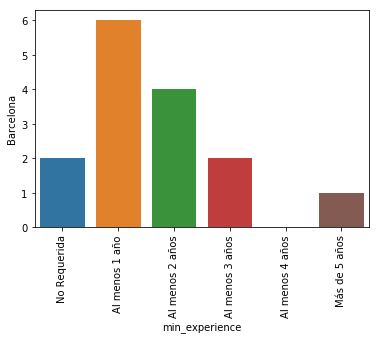

In [23]:
sns.countplot(x = 'min_experience', data = bcn_data, order=['No Requerida','Al menos 1 año','Al menos 2 años','Al menos 3 años','Al menos 4 años', 'Más de 5 años'])
plt.xticks(rotation=90)
plt.ylabel('Barcelona')
plt.savefig("graficos/bcnoffers.png")
plt.show()

In [24]:
bf_df.groupby(['city', 'min_experience']).count()

id  skills  min_salary  \
city                       min_experience                            
Alcalá De Henares          Al menos 2 años   1       1           0   
Alcobendas                 No Requerida      1       1           0   
Avilés                     Al menos 2 años   1       1           0   
Barcelona                  Al menos 1 año    6       6           3   
                           Al menos 2 años   4       4           2   
                           Al menos 3 años   2       2           1   
                           Más de 5 años     1       1           1   
                           No Requerida      2       2           2   
Berango                    Al menos 3 años   1       1           1   
Bilbao                     Al menos 2 años   1       1           0   
Burgos                     No Requerida      1       1           0   
Castelldefels              Al menos 4 años   1       1           1   
Collado Villalba           No Requerida      1       1           0   
Cádiz                      Al menos 1 año    1       1           0   
El Prat De Llobregat       Al menos 3 años   1       1           0   
Elche                      Al menos 1 año    1       1           1   
Finestrat                  Al menos 1 año    1       1           0   
Gandia                     Al menos 1 año    1       1           0   
Getxo                      Al menos 3 años   1       1           1   
Guardamar Del Segura       Al menos 3 años   1       1           0   
L'Hospitalet De Llobregat  Al menos 3 años   1       1           1   
La Zubia                   Al menos 2 años   2       2           0   
Lleida                     No Requerida      1       1           0   
Logroño                    Al menos 2 años   1       1           1   
Madrid                     Al menos 1 año   10      10           2   
                           Al menos 2 años   8       8           2   
                           Al menos 3 años   6       6           4   
                           Más de 5 años     4       4           1   
Málaga                     Al menos 1 año    1       1           1   
                           Al menos 2 años   1       1           1   
                           No Requerida      1       1           0   
Pamplona/Iruña             Más de 5 años     1       1           0   
Pinto                      Al menos 2 años   1       1           1   
Pozuelo De Alarcón         Al menos 4 años   1       1           0   
San Sebastián De Los Reyes Al menos 3 años   1       1           1   
Sant Boi De Llobregat      Al menos 1 año    1       1           1   
Sant Cugat Del Valles      Al menos 4 años   3       3           2   
Santiago De Compostela     Al menos 2 años   1       1           0   
Sevilla                    Más de 5 años     1       1           0   
Sitges                     Al menos 2 años   1       1           0   
Tarragona                  Al menos 2 años   1       1           0   
Valencia                   Al menos 2 años   2       2           2   
Zaragoza                   Al menos 2 años   1       1           1   

                                            max_salary  salary_period  \
city                       min_experience                               
Alcalá De Henares          Al menos 2 años           0              1   
Alcobendas                 No Requerida              0              1   
Avilés                     Al menos 2 años           0              1   
Barcelona                  Al menos 1 año            3              6   
                           Al menos 2 años           2              4   
                           Al menos 3 años           1              2   
                           Más de 5 años             1              1   
                           No Requerida              2              2   
Berango                    Al menos 3 años           1              1   
Bilbao                     Al menos 2 años           0              1   
Burgos           

In [25]:
bf_df.groupby('min_experience').count()

,id,city,skills,min_salary,max_salary,salary_period,Latitude,Longitude
min_experience,,,,,,,,
Al menos 1 año,22,22,22,8,8,22,22,22
Al menos 2 años,26,26,26,10,10,26,26,26
Al menos 3 años,14,14,14,9,9,14,14,14
Al menos 4 años,5,5,5,3,3,5,5,5
Más de 5 años,7,7,7,2,2,7,7,7
No Requerida,7,7,7,2,2,7,7,7


In [26]:
text = " ".join(skill for skill in bf_df.skills)
print (f"There are {len(text)} words in the combination of all review.")

There are 19255 words in the combination of all review.


In [27]:
stopwords = set(STOPWORDS)
stopwords.update(["de","que","tecnologia","experience","years","Se","valorará","skills","capacidad","UK","el","como","level", "Experiencia","mínimo","Good","años","good","trabajo", "con","por", "en", "las", "desarrollo", "Conocimiento", "Conocimientos", "la","etc", "para", "similar", "menos","tecnología", "año", "al", "knowledge", "proyecto", "framework", "frameworks"])

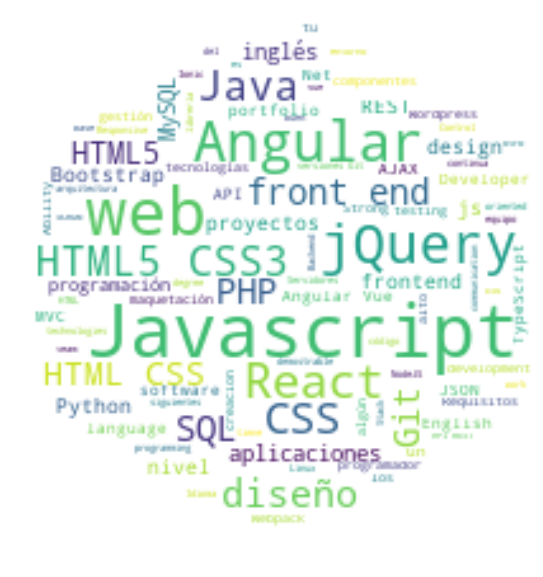

In [28]:
iron_mask = np.array(Image.open("ironhack_logo.png"))
wc = WordCloud(background_color="white",width=1000, height=1000, max_words=1000, mask=iron_mask, stopwords=stopwords)
wc.generate(text)
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
wc.to_file("graficos/skills.png")
plt.show()

In [29]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [30]:
crs = {'init': 'EPSG:4326'}

In [31]:
geometry = [Point(xy) for xy in zip(bf_df['Longitude'],bf_df['Latitude'])]

In [32]:
geo_df = gpd.GeoDataFrame(bf_df, crs = crs, geometry = geometry)

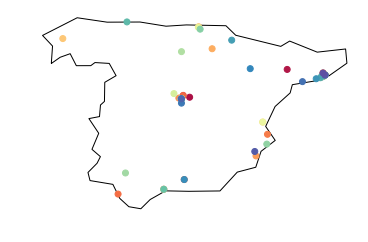

In [33]:
ax = world[world.name == 'Spain'].plot(color='white', edgecolor='black')
geo_df.plot(ax=ax, cmap = 'Spectral')
ax.set_axis_off()
plt.savefig("graficos/spainmap.png")
plt.show()


In [34]:
salaries_df = pd.read_csv('csvs/salaries_stack.csv', sep= ";")

In [35]:
salaries_df.groupby('YearsCodingProf').count()

,Country,DevType,Salary,SalaryType,CurrencySymbol
YearsCodingProf,,,,,
0-2 years,61,61,61,61,61
12-14 years,29,29,29,29,29
15-17 years,23,23,23,23,23
18-20 years,16,16,16,16,16
21-23 years,10,10,10,10,10
24-26 years,4,4,4,4,4
3-5 years,110,110,110,110,110
6-8 years,74,74,74,74,74
9-11 years,57,57,57,57,57


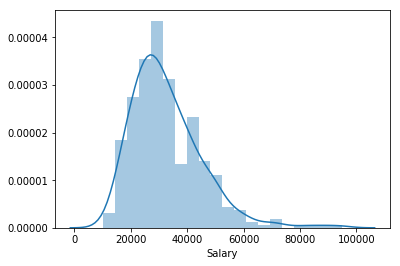

In [36]:
sns.distplot(salaries_df.Salary)
plt.savefig("graficos/distplot.png")
plt.show()

In [37]:
µ = salaries_df.Salary.mean()
print(µ)

32700.911458333332


In [38]:
# Variables
conf_lvl = 0.95;
deg_fr = len(salaries_df.Salary) - 1
sm = np.sqrt(np.var(salaries_df.Salary, ddof = 1))

# Confidence interval
stats.t.interval(conf_lvl, df=deg_fr, loc=µ, scale=sm)

(7923.776403036736, 57478.04651362993)